<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Analyzing-dataset" data-toc-modified-id="Analyzing-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyzing dataset</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Portratis-of-users" data-toc-modified-id="Portratis-of-users-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Portratis of users</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-1.-Average-user-ratings-are-the-same-for-Xbox-One-and-PC-platforms." data-toc-modified-id="Hypothesis-1.-Average-user-ratings-are-the-same-for-Xbox-One-and-PC-platforms.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Hypothesis 1. Average user ratings are the same for Xbox One and PC platforms.</a></span></li><li><span><a href="#Hypothesis-2.-Average-user-ratings-for-Action-and-Sports-genres-are-not-the-same" data-toc-modified-id="Hypothesis-2.-Average-user-ratings-for-Action-and-Sports-genres-are-not-the-same-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Hypothesis 2. Average user ratings for Action and Sports genres are not the same</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Definition of a successful game platform and game product

### Project description

**Brief information:** an online store that sells computer games around the world, is planning an advertising campaign based on a potentially popular product.

**Objective:** define a potentially popular product.

**Tasks:** define the relevant time period to determine the factors that influence sales; identify the most potentially profitable platforms, genres, and geographies; and determine the factors that influence sales volume.

### Data description

The dataset contains a table with the following columns:

* `Name` — name of a game
* `Platform` — name of a platform
* `Year_of_Release` — year of game release
* `Genre` — genre of a game
* `NA_sales` — sales in North America (copies sold in millions)
* `EU_sales` — sales in Europe (copies sold in millions)
* `JP_sales` — sales in Japana (copies sold in millions)
* `Other_sales` — sales in other regions (copies sold in millions)
* `Critic_Score` — critics score (100 points max)
* `User_Score` — users score (10 points max)
* `Rating` — ESRB (Entertainment Software Rating Board) game ratings. This organization determines the rating of computer games and assigns them to the appropriate age category.

### Analyzing dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
# reading file
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# calculating number of rows and columns
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns in the dataset: {df.shape[1]}')

Number of rows in the dataset: 16715
Number of columns in the dataset: 11


In [4]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's convert the column names to lowercase.

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


The following columns have missing values:
* `critic_Score`
* `rating`
* `user_Score`
* `year_of_Release`
* `name`
* `genre`

Let's calculate the proportion of nans in these columns.

In [7]:
# calculating share of nans
df.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

The largest number of nans is observed in the columns:
* critics scores;
* age rating;
* users scores. 

The missing values in the user and critics' ratings columns should be left as they are, since game ratings are very subjective, and one should not decide for critics and players about ratings and distort observations. It should also be noted that a game's rating can be influenced by factors such as the game's optimization for a particular platform. Therefore, the gaps in these columns should be filled with empty values (e.g. "-1"). During further processing of the dataset, we will exclude rows with these values from the analysis.

Some of the missing values in the ESRB age rating column can be filled in with the rating mod for each game title. The games FIFA 14 and Need for Speed: Most Wanted are examples. In this table you can see the missing ratings for the same game.

In [8]:
# dataframe slice with fifa and most wanted
df.query('name == "FIFA 14" or name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN


We will also fill in the remaining part of the missing values with stub values since it is impossible to estimate the age category for which the game is designed. For example, in the action genre, there can be both games for children (LEGO) and games containing scenes of violence and profanity (Wolfenstein). At the same time, this rating is most likely absent for games published before 1994 (<a href="https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board">ESRB history</a>).

In [9]:
# checking ratings for each genre
df.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          681
              M          608
              E10+       481
              E          416
              AO           1
              EC           1
Adventure     E          162
              T          115
              M           99
              E10+        68
              EC           2
Fighting      T          362
              M           49
              E10+        19
              E            8
Misc          E          457
              T          239
              E10+       167
              M           13
              EC           5
              K-A          1
Platform      E          358
              E10+       144
              T           64
              M            3
Puzzle        E          289
              E10+        43
              T           10
Racing        E          585
              T          172
              E10+        96
              M           18
              RP           1
Role-Playing  T       

In [10]:
# df slice by date and nans in the rating column
df.query('year_of_release < 1994 and ~rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2612,The 7th Guest,PC,1992.0,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T
14610,Doom,PC,1992.0,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+


The organization managed to assign a rating to some games that were released before its creation. It is possible that these games have been re-released. At the same time, the omissions are also observed for more recent games, which may indicate an error in downloading the information, or an error in the database from which the information was extracted.

In [11]:
# df slice witn nans and years counting
df.query('rating.isna()')['year_of_release'].value_counts()

2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     62
1981.0     46
1991.0     41
1992.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1987.0     16
1990.0     16
1984.0     14
1988.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

Lets take a closer look at the missing values in the name and genre columns.

In [12]:
df.query('name.isna() or genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The missing values in these columns are in the same rows. These games were released for the Sega Genesis. Many games were released for this platform in 1993, so it is not possible to fill in the missing values. Maybe there was a technical error or a wrong entry in the database when unloading the data - these rows are very similar to a game, as only sales in Japan are marked for the second observation. We will remove these rows from the dataset in the future.

Let's take a closer look at the rows with missing values in the year of release column.

In [13]:
# df slice with nans in year of release
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Missing values can be characterized by both parser errors, as some games have a year in their name, and unspecified values in the database. In general, the proportion of such omissions is insignificant, and these observations cannot be considered in the future.

We use the `value_counts` method to check for explicit and implicit duplicates.

In [14]:
# counting values in each column
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


name
Need for Speed: Most Wanted                       12
Ratatouille                                        9
Madden NFL 07                                      9
LEGO Marvel Super Heroes                           9
FIFA 14                                            9
                                                  ..
A Witch's Tale                                     1
World Championship Athletics                       1
Interactive Storybook DS Series 3                  1
Ishin Renka: Ryouma Gaiden                         1
Naruto Shippuden: Gekito Ninja Taisen! Special     1
Name: name, Length: 11559, dtype: int64

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO       

Separately, it should be noted that there are observations with tbd values in the user rating column. These values may indicate a lack of reviews at the time of the game's release or a very low number of user reviews for the game's title. Such values should also be considered as nans.

As for the column formats, some of them should be changed:

* year of release - convert to an integer value (the year is an integer);
* user rating - convert to numeric values, replacing 'tbd' values with missing values in float format.

To check for duplicates in the observations, the contents of the game name, platform, and genre columns should be converted to lowercase.

To further analyze the most profitable titles and genres, we'll create a column with the total sales of each game title across all regions.

#### Conclusions

* **It is not possible to fill in the columns with user and critics ratings, because game ratings are very subjective. Among other things, these ratings can be influenced by factors such as the optimization of the game for a particular platform. The gaps in these columns should be filled with empty values (e.g. -1). In further processing of the dataset, we will exclude the rows with these values from the analysis.**

* **Some of the missing values in the age rating column will be filled with the rating mod for each game title. We will fill the rest of the gaps with blank values, since determining the age rating of a game is somewhat difficult. For example, in the action genre, there can be both games for children (LEGO) and games that contain scenes of violence and profanity (Wolfenstein).**

* **Missing values in the column with the release date of the game are characterized by a shortcoming of the parser and possibly by the absence of the observations themselves in the database. The proportion of such omissions is insignificant, and they can be excluded from the dataset during the subsequent analysis.**

* **The share of missing values in the columns with the name and genre of the game is less than 1% of the total volume of the dataset. It is impossible to fill them in, so these observations should be excluded from the analysis.**

* **The column formats for observations characterizing the release year should be changed (converted to an integer value). Also, the user rating column should be converted to numeric values.**

* **Convert the contents of the game, platform, and genre name columns to lowercase.**

* **For further analysis of the most profitable titles and genres, create a column with the total sales of each game title across all regions.**

### Data pre-processing

Before exploratory data analysis and hypothesis testing, we'll remove missing values in the `name` and `genre` columns, and lowercase the contents of the `name`, `platform`, and `genre` columns.

In [15]:
# deleting nans in name and genre columns
df.dropna(subset=['name', 'genre'], inplace=True)
# lowercase formatting
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

Next, we'll fill in the missing values in the `year_of_release` column with "-1" and the nans in the `rating` column for each game title.

In [16]:
# filling nans
df['year_of_release'] = df['year_of_release'].fillna(-1)

In [17]:
# filling some of the missing values with a modal value for a particular game title
# looping through unique titles
for game in df['name'].unique():
    mode = df.loc[df['name'] == game,'rating'].value_counts(dropna=False).idxmax() # calculating mode and extracting the value
    df.loc[(df['rating'].isna()) & (df['name'] == game),'rating'] = mode # filling nans with the calculated value

In [18]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           10112 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [19]:
# filling remaining nans with the unknown string
df['rating'] = df['rating'].fillna('unknown')

In [20]:
# check
df.query('name == "fifa 14" or name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,fifa 14,ps3,2013.0,sports,0.78,4.24,0.07,1.37,86.0,4.3,E
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
271,fifa 14,x360,2013.0,sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,fifa 14,ps4,2013.0,sports,0.61,1.85,0.11,0.44,87.0,6.3,E
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,T
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1753,fifa 14,xone,2013.0,sports,0.41,0.66,0.00,0.09,88.0,5.8,E
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,T


Let's convert the game release date column to integer format.

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

Next, let's convert the column with the user rating of the game into a numeric format, treating the 'tbd' values as missing values.

In [22]:
df['user_score'] = df['user_score'].replace({'tbd': float('nan')}).astype('float')

In the dataset, we'll create a column with the total sales of the game title across all regions.

In [23]:
# total sales column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
# check
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [25]:
# checking for nans and columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [26]:
# checking for implicit duplicates in genre column
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [27]:
# checking for implicit duplicates in platform column
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [28]:
# checking for explicit duplicates
df.duplicated().sum()

0

#### Conclusions

* **Missing values in the game title name and genre columns have been removed from the dataset. The contents of these columns, as well as the column with the name of the game platforms, have been converted to lower case.**
* **Missing values in the year of release column are filled with an empty value "-1". Nans in the age rating column are filled with a mode for each game title. The remaining nans in this column are filled with an empty value of "unknown".**
* **The year of release column has been converted to an integer format. The user rating column is converted to a numeric data format.**
* **Added a column with the total sales of game titles by all regions for each observation.**
* **An analysis for the presence of explicit and implicit duplicates in the dataset revealed their absence.**

### EDA

Before determining the factors that influence the sales volume of game titles, we will research and determine the most relevant period of their sales to forecast future sales. Therefore, we will determine the life cycles of the platforms represented in the dataset. For this purpose, we will consider the number of released games and the sales volume by year for the observed period - we will build linear graphs. From the number of released games we will take the number of game titles - each platform requires its optimization and development.

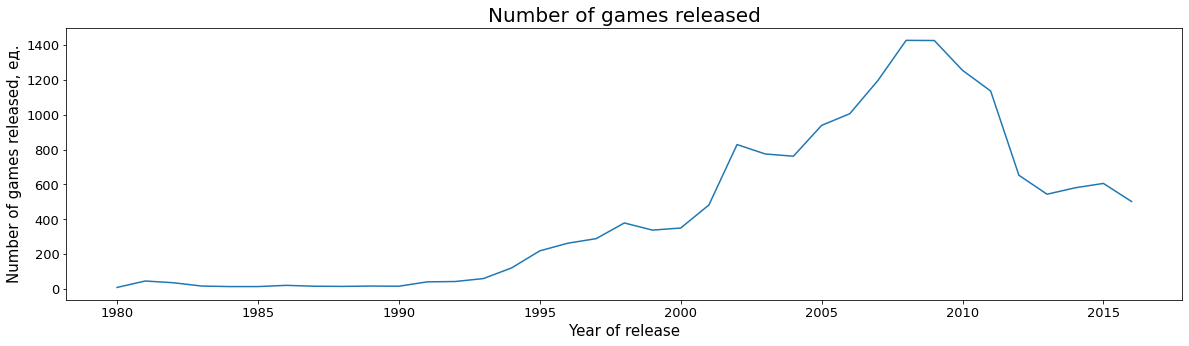

In [29]:
# plotting pivot table by year
(df
.query('year_of_release > 0')
.pivot_table(index='year_of_release', values='name', aggfunc='count')
.plot(figsize=(20,5), fontsize=13, legend=False))

plt.title('Number of games released', fontsize=20)
plt.xlabel('Year of release', size=15)
plt.ylabel('Number of games released, ед.', size=15)
plt.show()

From 1995 to 2000, the number of games released began to grow linearly. Up to that point, the number of games released had been at about the same level. In 2000, the growth rate increased to more than 400 titles per year. Since 2009-2010 we can observe a negative dynamics in the number of released games. This may be due both to the appearance of mobile platforms on the market (this dataset does not contain information about such platforms) and to the increase in the time required for the development of modern game projects. 

Thus, based on this chart, we can assume that data older than 2005 is not needed to determine the factors that influence sales volumes. However, we should take a closer look at the lifecycle of platforms, as many of them are no longer relevant due to technological developments. To do this, we will create a sales graph in the context of the 10 most popular platforms.

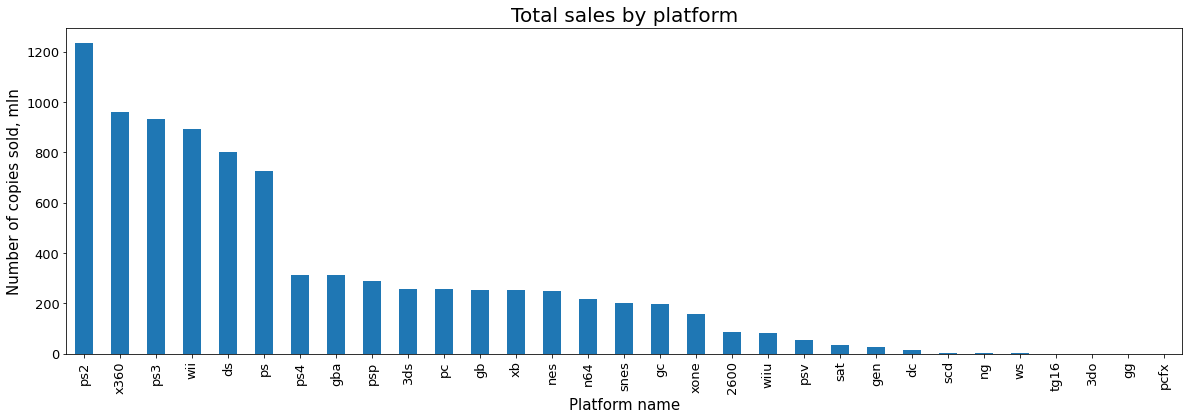

In [30]:
# sales pivot table by platform
(df
.query('year_of_release > 0')
.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False)
.plot(kind='bar', figsize=(20,6), legend=False, fontsize=13))

plt.title('Total sales by platform', fontsize=20)
plt.xlabel('Platform name', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

The most popular platforms of all time (top 10) are ps2, x360, ps3, Wii, ds, ps, ps4, GBA, PSP, and 3ds. To analyze the life cycle of platforms, let's create a sales graph for the top ten by year.

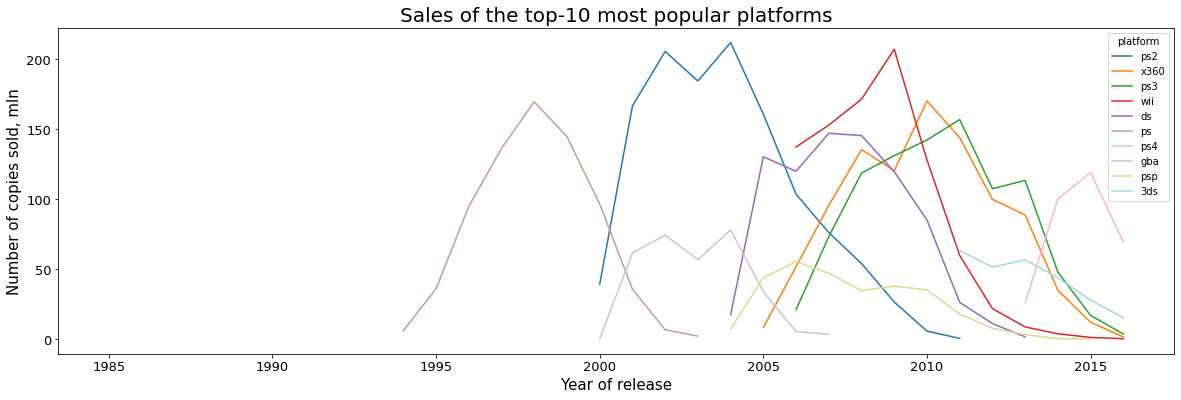

In [31]:
(df
.query('year_of_release > 0') 
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum', columns='platform', margins=True, margins_name='Total_sales') # pivot table with row and column totals
.sort_values(by='Total_sales', ascending=False) # sorting by row in ascending order
.drop('Total_sales', axis=1) # deleting column with totals
.sort_values(by='Total_sales', ascending=False, axis=1) # sorting by column in ascending order
.drop('Total_sales').iloc[:,:10] # deleting row with totals and choosing top 10 platforms by sales
.sort_values(by='year_of_release') # sorting by year
.plot(figsize=(20,6), fontsize=13, colormap='tab20')) # plot

plt.title('Sales of the top-10 most popular platforms', fontsize=20)
plt.xlabel('Year of release', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

It should be noted that sales volumes have recently been declining for all platforms. On average, the life cycle of platforms is about 10 years. Let's calculate this metric and compare it to the chart.

In [32]:
platform_time = (df
.query('year_of_release > 0')
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum', columns='platform', margins=True, margins_name='Total_sales') # pivot table with row and column totals
.sort_values(by='Total_sales', ascending=False) # sorting by row in ascending order
.drop('Total_sales', axis=1) # deleting column with totals
.sort_values(by='Total_sales', ascending=False, axis=1) # sorting by column in ascending order
.drop('Total_sales').iloc[:,:10] # deleting row with totals and choosing top 10 platforms by sales
.sort_values(by='year_of_release'))

In [33]:
platform_time

platform,ps2,x360,ps3,wii,ds,ps,ps4,gba,psp,3ds
year_of_release,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# calculating platform life cycle
platform = []
time_list = []
for name in platform_time.columns: # looping through platform names
    platform.append(name)
    time = platform_time[name].last_valid_index() - platform_time[name].first_valid_index() # timedelta between last and first non-zero index
    time_list.append(time)

In [35]:
# df with life cycle
times = pd.DataFrame(index=platform,data=time_list)

In [36]:
times

,0
ps2,11
x360,11
ps3,10
wii,10
ds,28
ps,9
ps4,3
gba,7
psp,11
3ds,5


In [37]:
times.replace(28,9, inplace=True)

In [38]:
print(f'Lifecycle median: {times.median()}')
print(f'Lifecycle average: {times.mean()}')

Lifecycle median: 0    9.5
dtype: float64
Lifecycle average: 0    8.6
dtype: float64


It should be noted that the ds platform, which appeared in 2004, the game was released in 1985. Therefore, the lifetime of this platform is less than 28 years and is equal to 9 years. 

The lifespan of platforms should be evaluated on a median basis, as the top 10 platforms include both those that are beginning to disappear from the market and those that have just appeared. The latter platforms can distort the median life cycle value. So the life cycle is about 10 years. 

To determine the actual period, we should take a closer look at the sales volume starting in 2010, as this is when the shares of popular platforms start to decline and new platforms (e.g. ps4) appear after that year.

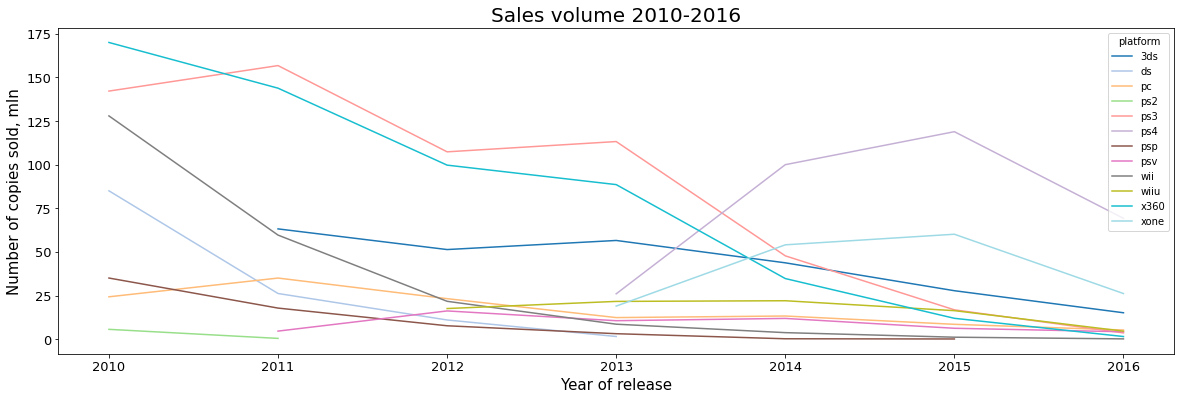

In [39]:
(df
.query('year_of_release >= 2010')
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum', columns='platform')
.plot(figsize=(20,6), fontsize=13, colormap='tab20'))

plt.title('Sales volume 2010-2016', fontsize=20)
plt.xlabel('Year of release', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

If you look at the chart, you can see that new platforms, such as XONE and PS4, emerged in 2013 and took a significant share of the market. By the beginning of 2013, some platforms had already gone out of business. Thus, given that data for 2016 may not be complete, data prior to 2013 and data for 2016 may not be relevant for predicting future sales. However, recent trends and factors affecting sales volumes are taken into account, and older platforms that are no longer in use are excluded from the analysis. 

In [40]:
# filtered dataframe with an actual period for forecasting
cleaned_df = df.query('year_of_release >= 2013 & year_of_release < 2016')

In [41]:
cleaned_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16668,fujiko f. fujio characters: great assembly! sl...,3ds,2014,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16682,grisaia no kajitsu: la fruit de la grisaia,psp,2013,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16692,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


Next, let's analyze the most popular platforms for the current data period (2013-2015) and plot a graph of sales volume by year.

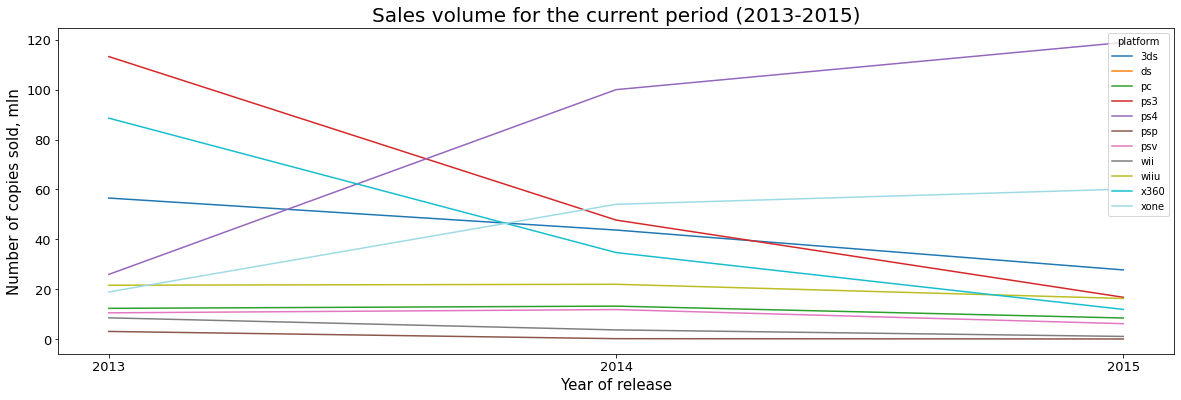

In [42]:
(cleaned_df
 .pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum')
 .plot(figsize=(20,6), fontsize=13, colormap='tab20'))

plt.title('Sales volume for the current period (2013-2015)', fontsize=20)
plt.xlabel('Year of release', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.xticks((2013,2014,2015))
plt.show()

On the graph, we can see the trend of new platforms such as xone and ps4, as well as the negative dynamics of sales for some platforms. For example, we can see a slight increase in sales for the WiiU platform in 2015. Given the lifecycle of platforms (10 years on average), we should soon focus on the sales of games for the xone, ps4, wiiu and pc platforms (as the longest and most stable platforms on the market).

In [43]:
# sales pivot table by platform and years
cleaned_df.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', margins=True, margins_name='Total_sales')

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone,Total_sales
year_of_release,,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96,361.24
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07,331.53
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14,267.98
Total_sales,128.11,1.54,34.18,177.83,244.89,3.50,28.74,13.48,60.03,135.28,133.17,960.75


Let's analyze the distribution of global sales for these platforms.

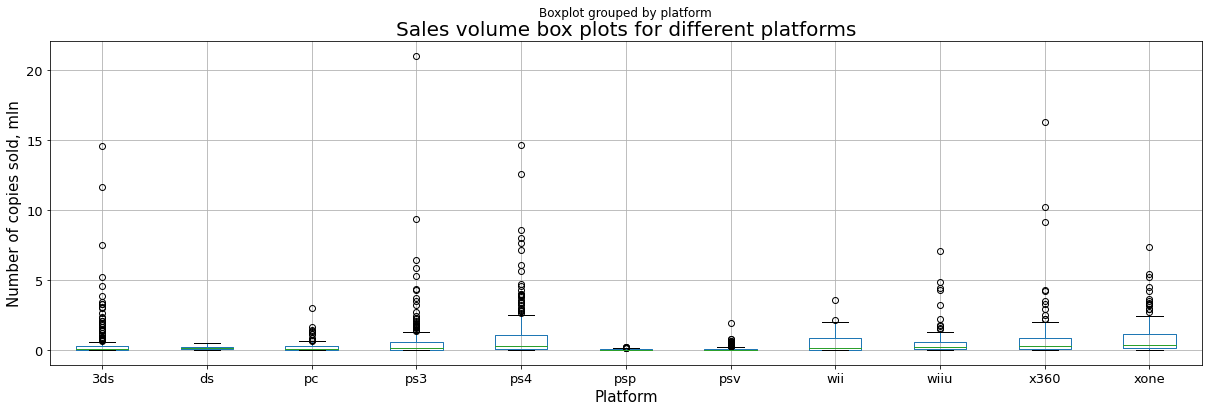

In [44]:
(cleaned_df
 .boxplot(column='total_sales', figsize=(20,6), by='platform', fontsize=13)
)
plt.title('Sales volume box plots for different platforms', fontsize=20)
plt.xlabel('Platform', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

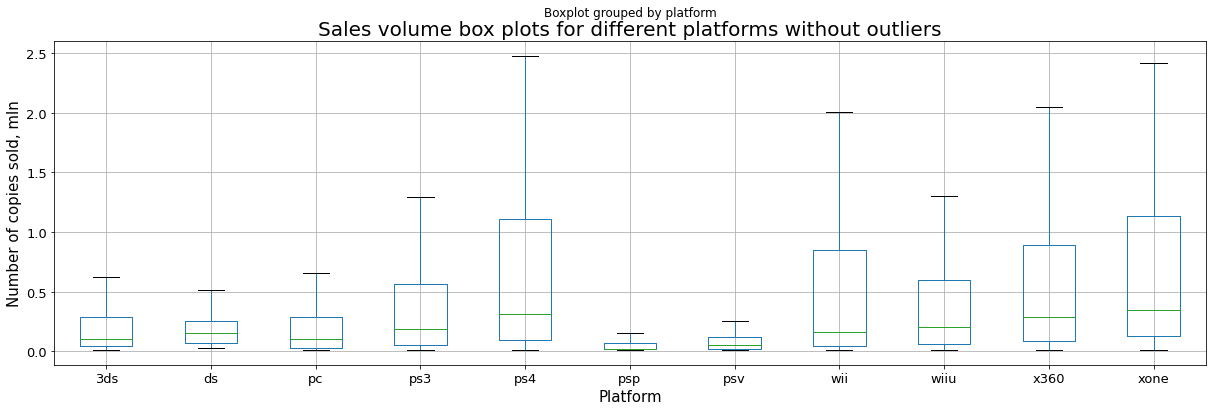

In [45]:
(cleaned_df
 .boxplot(column='total_sales', figsize=(20,6), by='platform', fontsize=13, showfliers=False)
)
plt.title('Sales volume box plots for different platforms without outliers', fontsize=20)
plt.xlabel('Platform', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

It should be noted that the sales volumes for the PS4 and Xone platforms are almost the same, with 75% of the titles consistently selling around 1.1 million copies. However, there is a wide range of values for these platforms - up to 2.5 million copies sold. The median sales are also almost identical (~ 0.25 million copies). 

The next platform in terms of sales is wiiu, with a smaller median and 0.75 quantile (~0.6 million copies).

The pc platform shows a smaller but more stable number of sales.

At the same time, the strong negative dynamics of sales on platforms such as 3ds, ds, ps3, PSP, psv, wii and x360 may indicate the earliest end of support for these platforms.

Therefore, marketing resources should be focused on the ps4, xone, wiiu and pc platforms.

Let's evaluate the impact of user and critic reviews on sales within a popular platform. To do this, we create scatterplots and correlation matrices.

In [46]:
# lists with prefered platforms and others
prefered_platforms = ['xone', 'ps4', 'wiiu', 'pc']
other_platforms = ['3ds','ds', 'ps3', 'psp', 'psv', 'wii', 'x360']

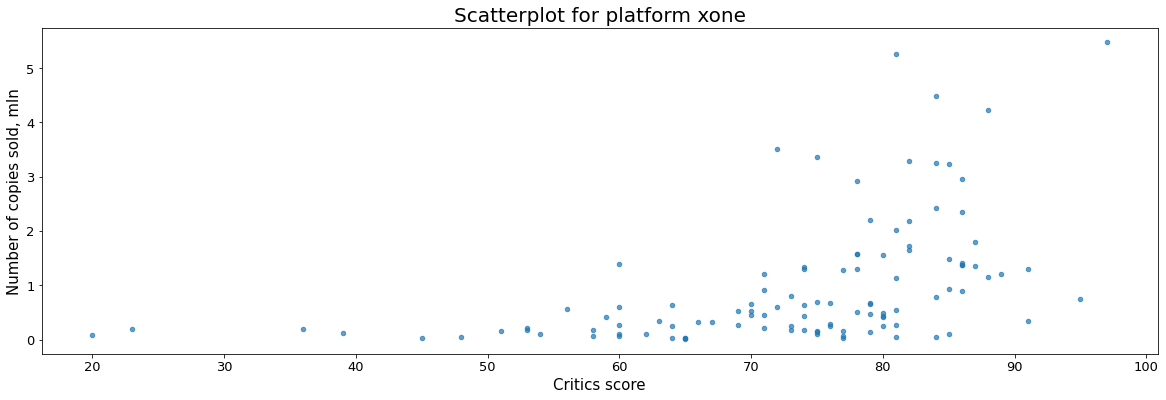

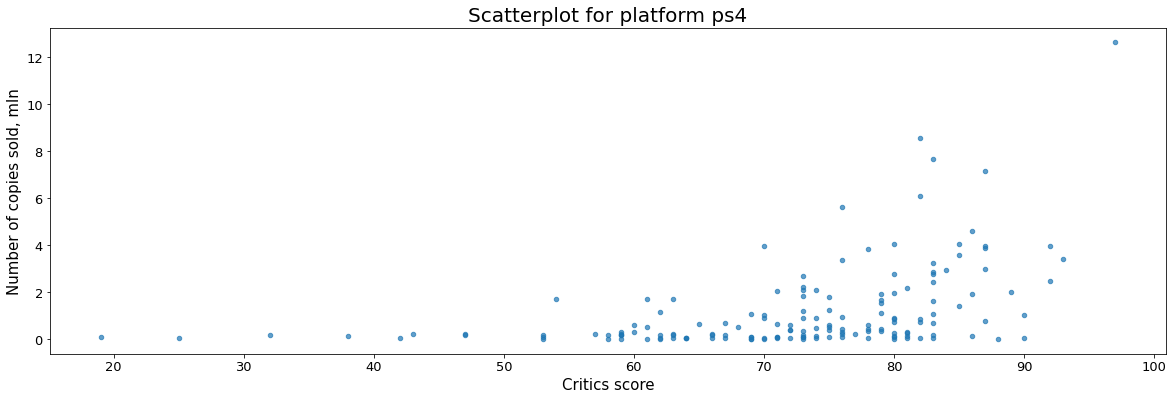

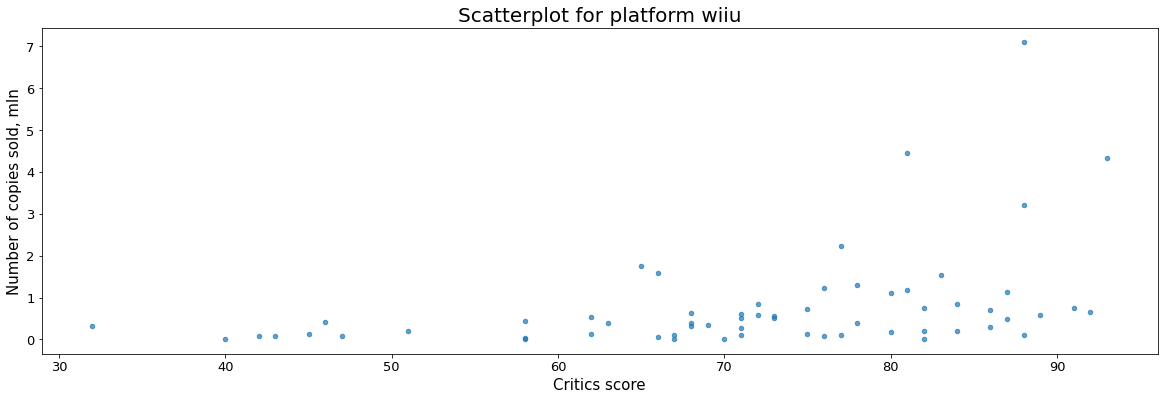

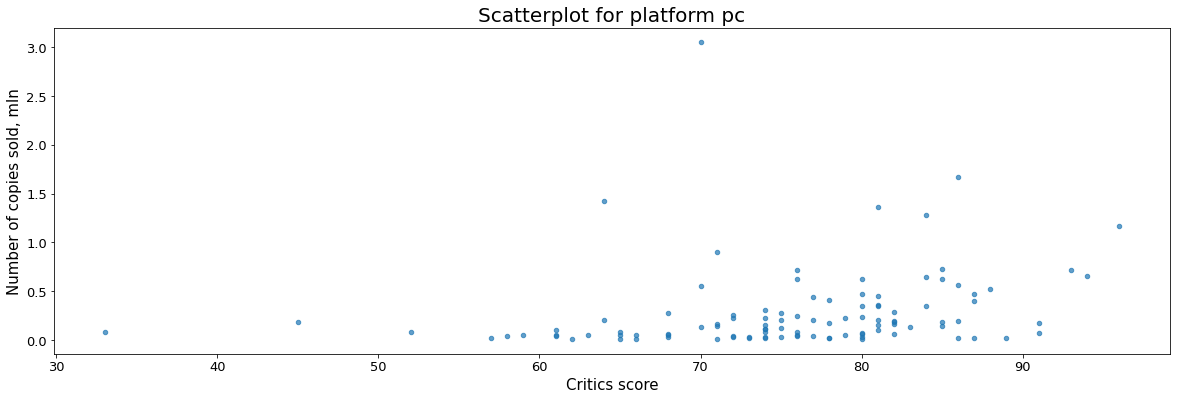

In [47]:
# sales volume scatterplots from critics scores for preferred platforms
for platform in prefered_platforms:
    filtered_df = cleaned_df.loc[cleaned_df['platform'] == platform,['user_score', 'critic_score', 'total_sales']]
    filtered_df.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(20,6), legend=True, fontsize=13, alpha=0.7)
    plt.title(f'Scatterplot for platform {platform}', fontsize=20)
    plt.xlabel('Critics score', size=15)
    plt.ylabel('Number of copies sold, mln', size=15)
    plt.show()

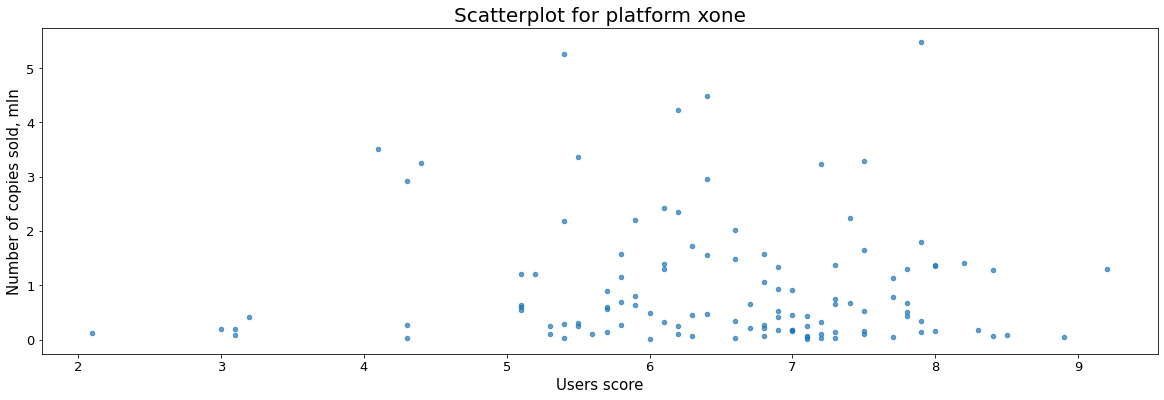

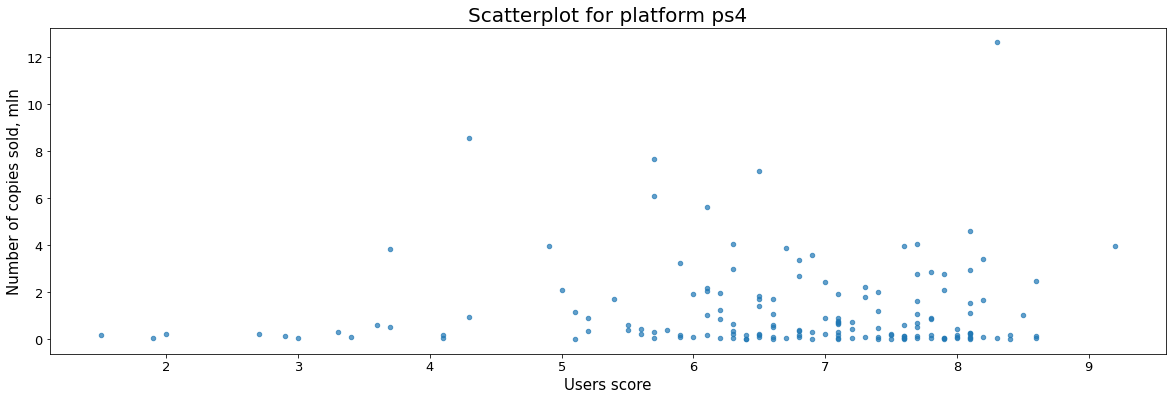

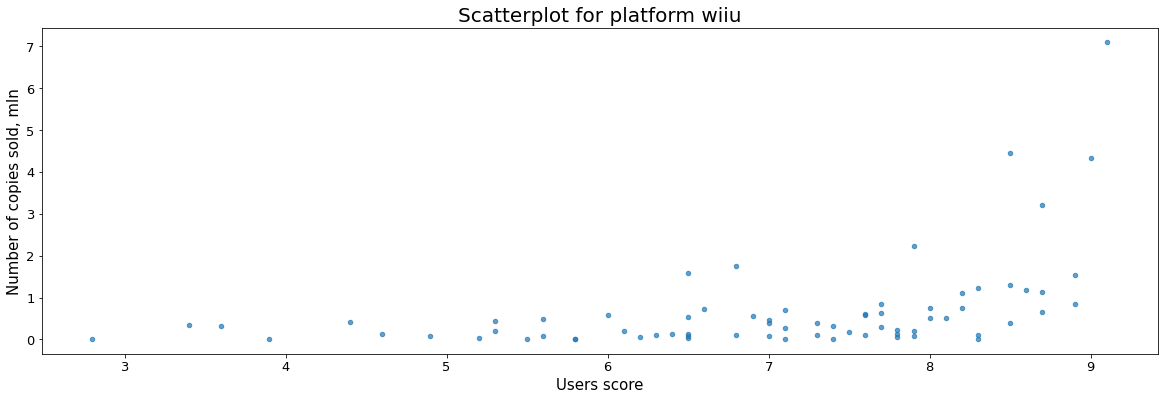

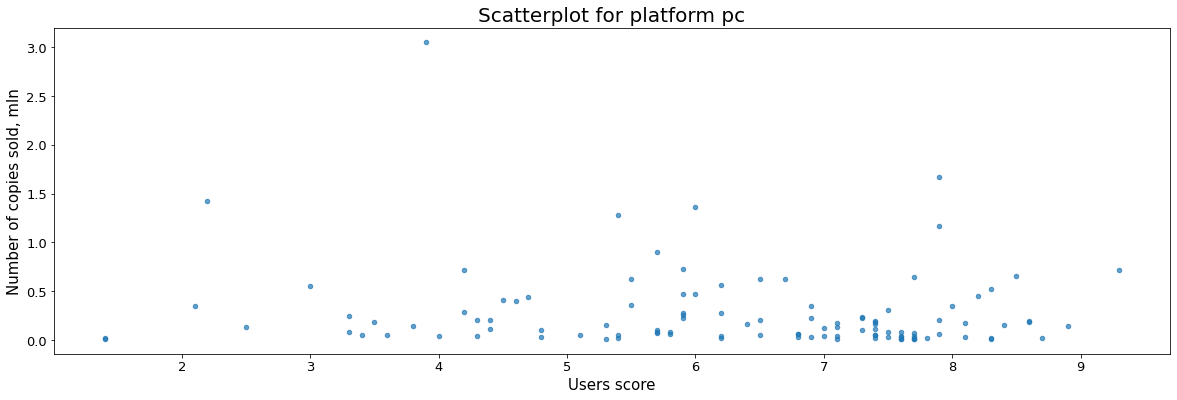

In [48]:
# sales volume scatterplots from users scores for preferred platforms
for platform in prefered_platforms:
    filtered_df = cleaned_df.loc[cleaned_df['platform'] == platform,['user_score', 'critic_score', 'total_sales']]
    filtered_df.plot(kind='scatter', x='user_score', y='total_sales', figsize=(20,6), legend=True, fontsize=13, alpha=0.7)
    plt.title(f'Scatterplot for platform {platform}', fontsize=20)
    plt.xlabel('Users score', size=15)
    plt.ylabel('Number of copies sold, mln', size=15)
    plt.show()

In [49]:
# correlation matrices for preferred platforms
for platform in prefered_platforms:
    filtered_df = cleaned_df.loc[cleaned_df['platform'] == platform,['user_score', 'critic_score', 'total_sales']]
    print(f'Correlation matrix for platform {platform}')
    print(filtered_df.corr())
    print('\n')

Correlation matrix for platform xone
              user_score  critic_score  total_sales
user_score      1.000000      0.499502    -0.039268
critic_score    0.499502      1.000000     0.459385
total_sales    -0.039268      0.459385     1.000000


Correlation matrix for platform ps4
              user_score  critic_score  total_sales
user_score      1.000000      0.612451     0.024231
critic_score    0.612451      1.000000     0.431848
total_sales     0.024231      0.431848     1.000000


Correlation matrix for platform wiiu
              user_score  critic_score  total_sales
user_score      1.000000      0.703029     0.433476
critic_score    0.703029      1.000000     0.383951
total_sales     0.433476      0.383951     1.000000


Correlation matrix for platform pc
              user_score  critic_score  total_sales
user_score      1.000000      0.412363    -0.129428
critic_score    0.412363      1.000000     0.216403
total_sales    -0.129428      0.216403     1.000000




The strongest linear relationship among these platforms is observed between critics' scores and sales volume (the range of the correlation coefficient was 0.21 to 0.46), except for wiiu - there is a slightly stronger relationship with players' scores (the correlation coefficient was 0.43). A moderate direct correlation between sales and critics' scores is observed for the xone, ps4, and wiiu platforms (the higher the score, the higher the sales). A weak direct correlation between critics' scores and sales volume is observed for the pc platform.
Starting from ~70 points on the critics score, there is a tendency for the sales volume of game titles to increase.

At the same time, there is almost no correlation between sales volume and player scores for the Xone, PS4, and PC platforms (scores have almost no effect on sales).

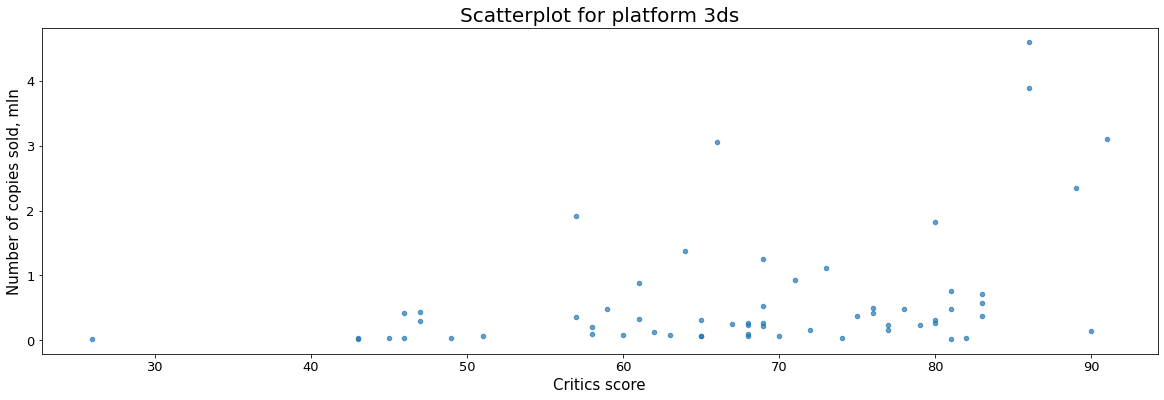

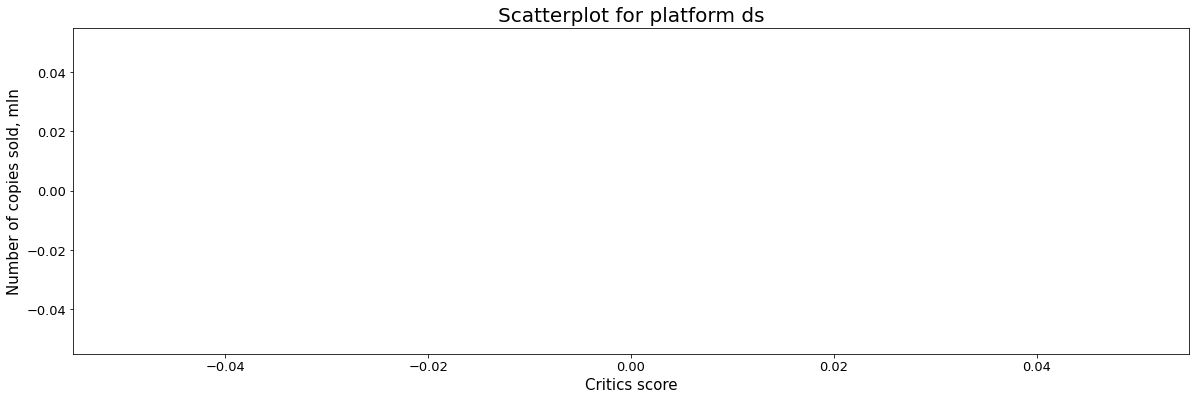

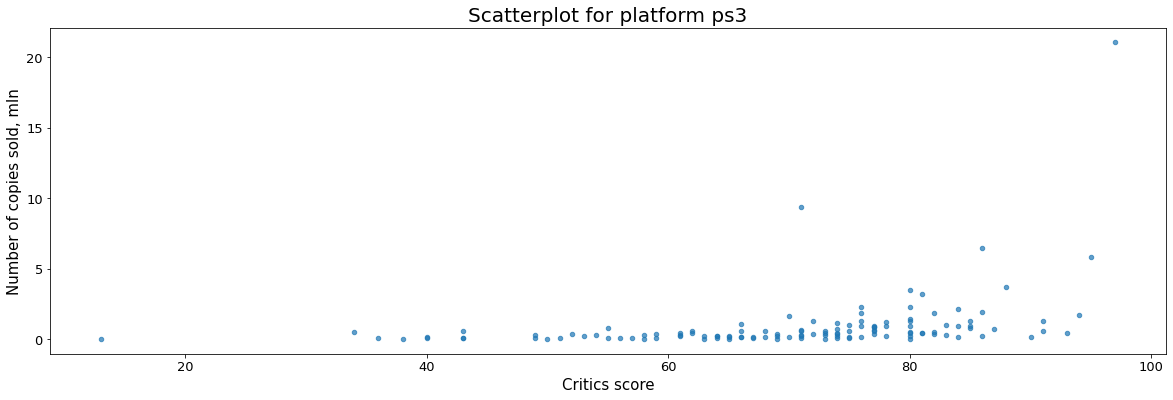

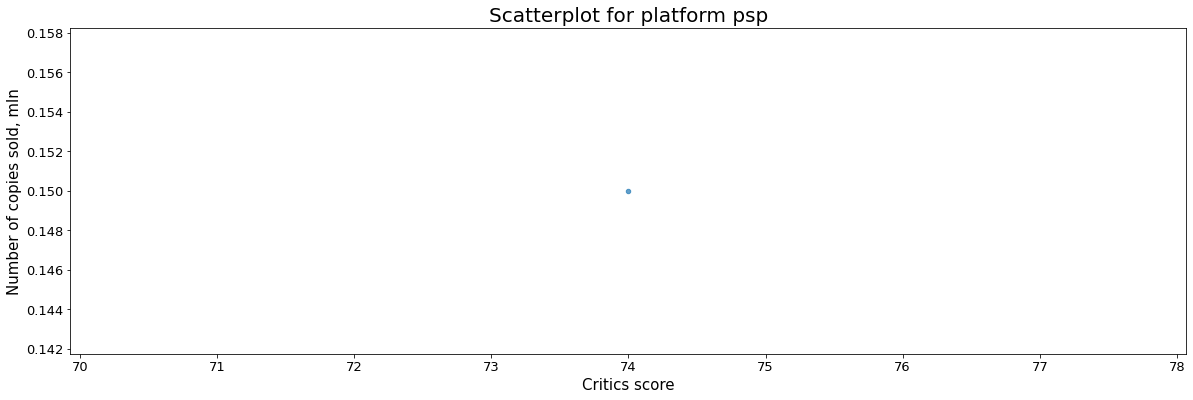

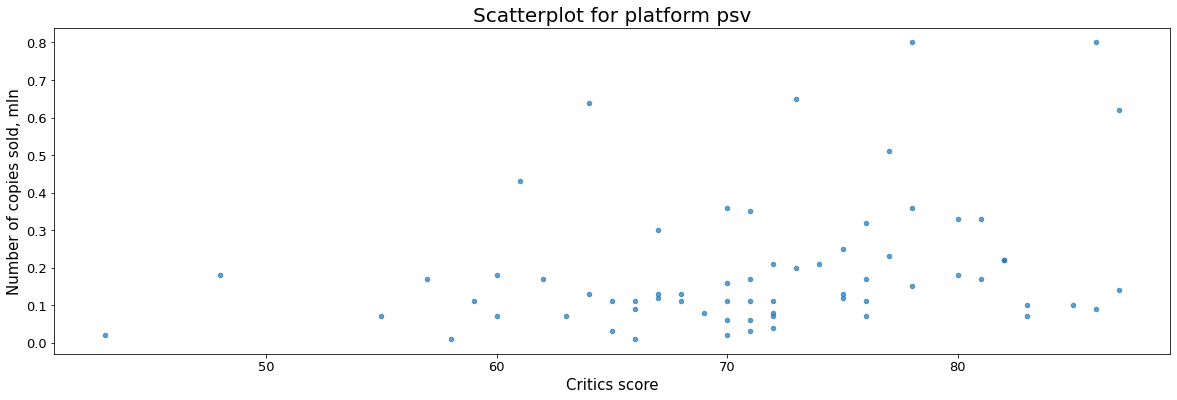

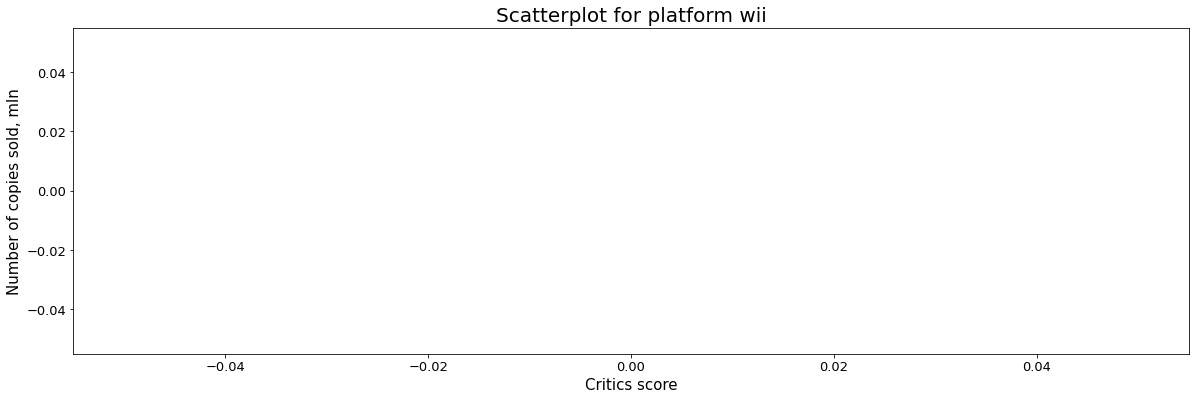

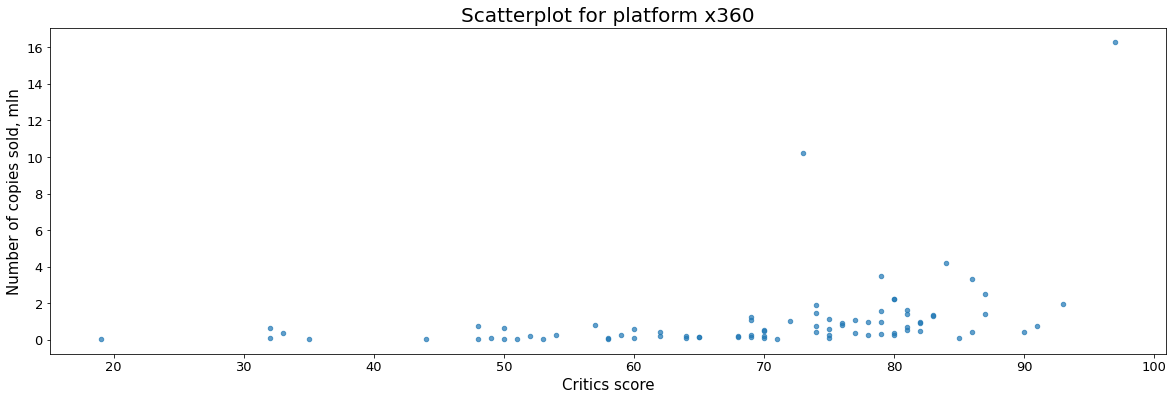

In [50]:
# sales volume scatterplots from critics scores for other platforms
for platform in other_platforms:
    filtered_df = cleaned_df.loc[cleaned_df['platform'] == platform,['user_score', 'critic_score', 'total_sales']]
    filtered_df.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(20,6), legend=True, fontsize=13, alpha=0.7)
    plt.title(f'Scatterplot for platform {platform}', fontsize=20)
    plt.xlabel('Critics score', size=15)
    plt.ylabel('Number of copies sold, mln', size=15)
    plt.show()

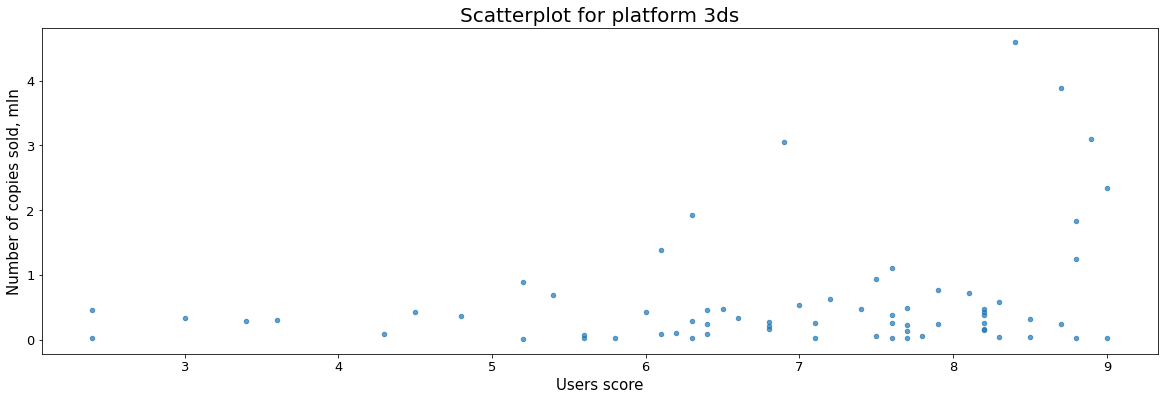

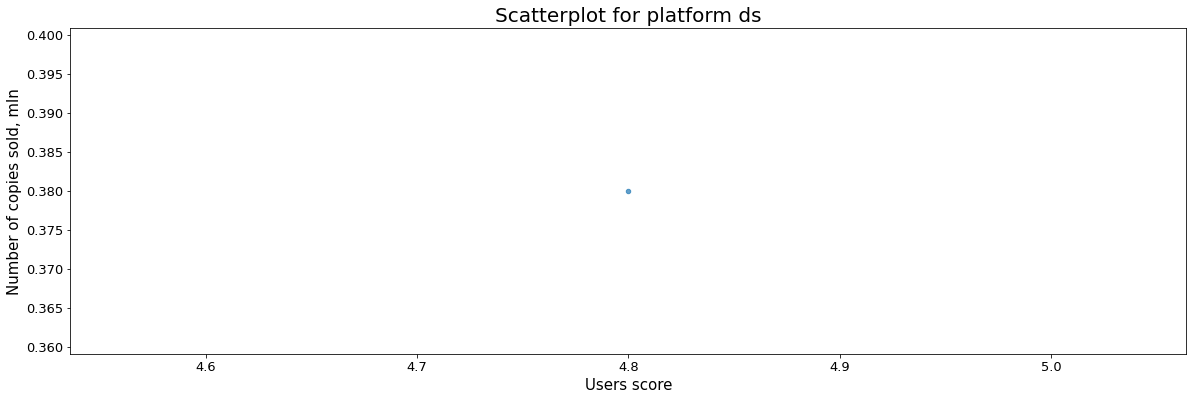

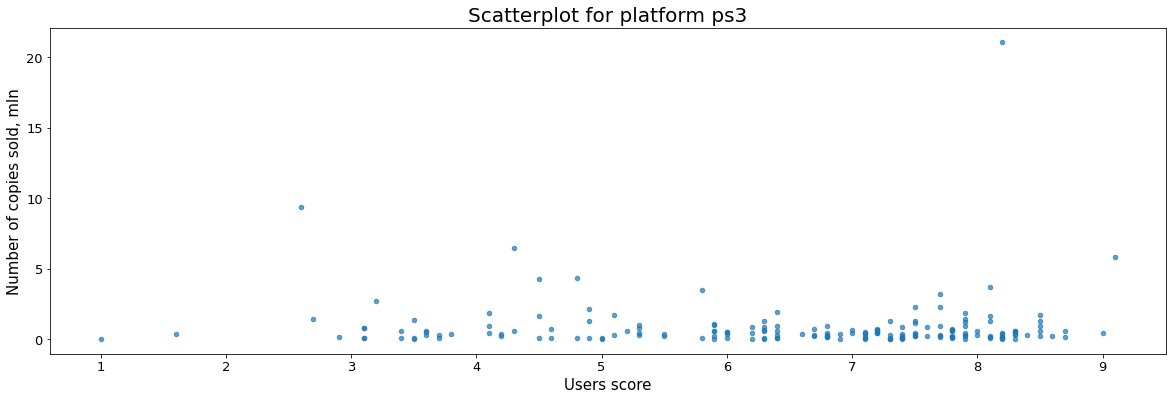

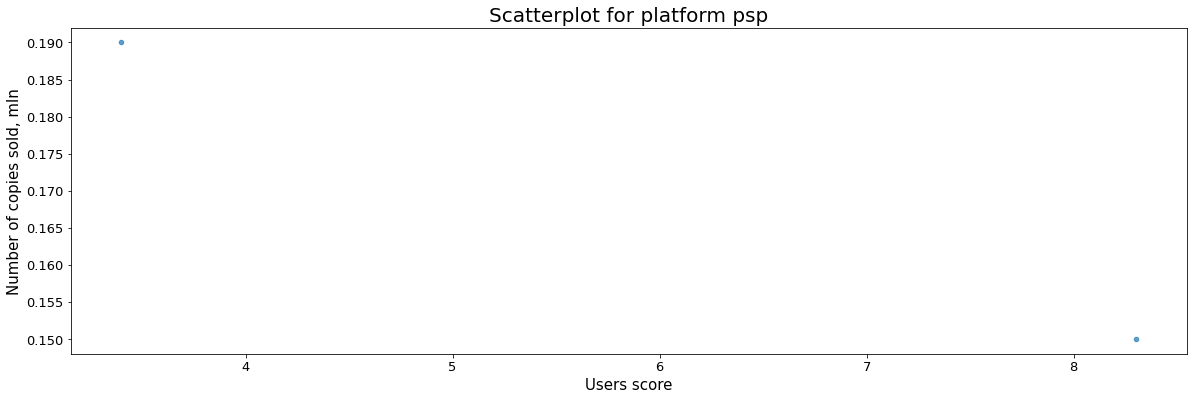

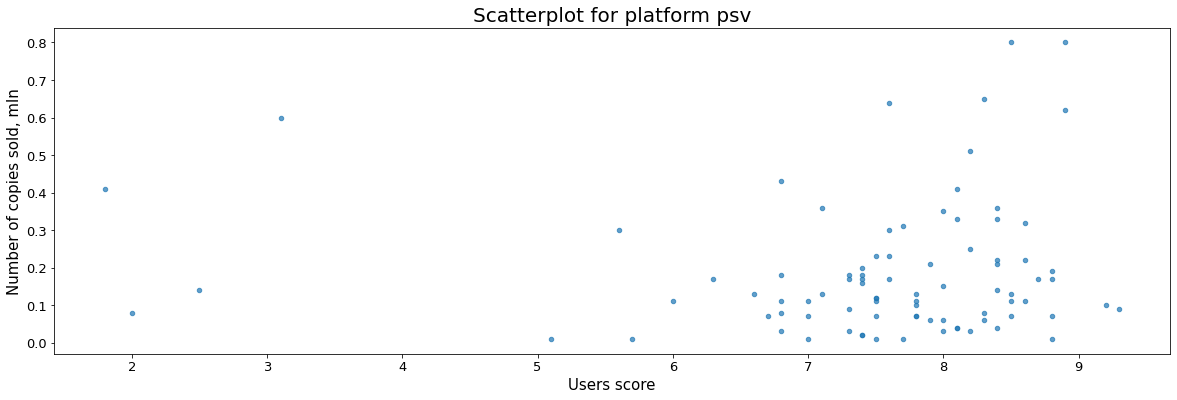

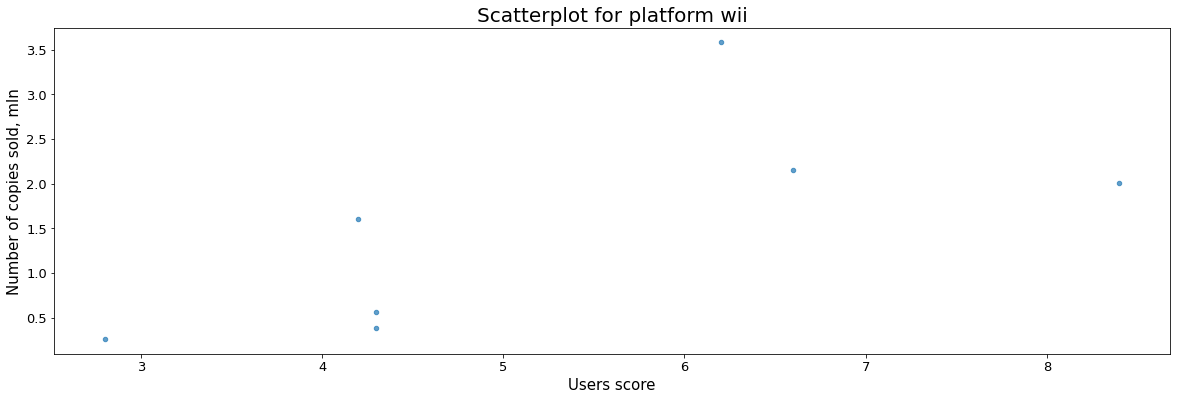

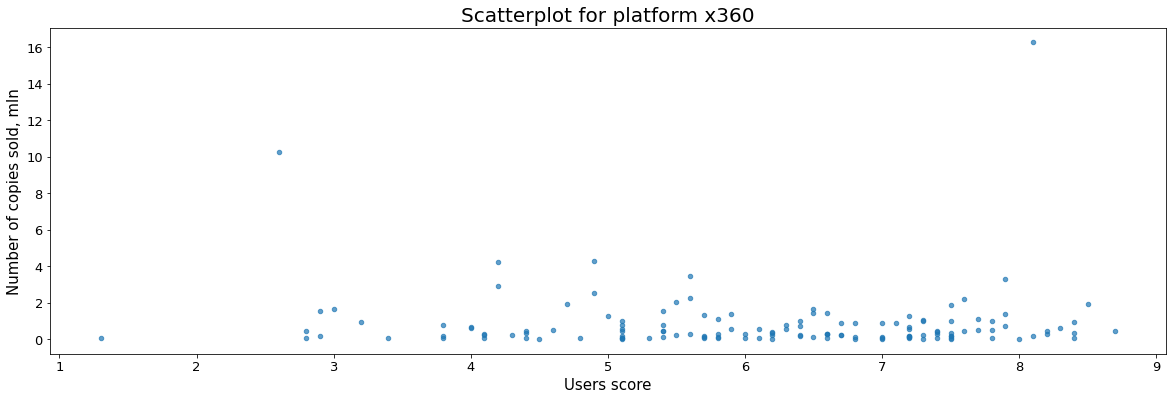

In [51]:
# sales volume scatterplots from users scores for other platforms
for platform in other_platforms:
    filtered_df = cleaned_df.loc[cleaned_df['platform'] == platform,['user_score', 'critic_score', 'total_sales']]
    filtered_df.plot(kind='scatter', x='user_score', y='total_sales', figsize=(20,6), legend=True, fontsize=13, alpha=0.7)
    plt.title(f'Scatterplot for platform {platform}', fontsize=20)
    plt.xlabel('Users score', size=15)
    plt.ylabel('Number of copies sold, mln', size=15)
    plt.show()

In [52]:
# correlation matrices for other platforms
for platform in other_platforms:
    filtered_df = cleaned_df.loc[cleaned_df['platform'] == platform,['user_score', 'critic_score', 'total_sales']]
    print(f'Correlation matrix for {platform}')
    print(filtered_df.corr())
    print('\n')

Correlation matrix for 3ds
              user_score  critic_score  total_sales
user_score      1.000000      0.776471     0.264711
critic_score    0.776471      1.000000     0.384326
total_sales     0.264711      0.384326     1.000000


Correlation matrix for ds
              user_score  critic_score  total_sales
user_score           NaN           NaN          NaN
critic_score         NaN           NaN          NaN
total_sales          NaN           NaN          1.0


Correlation matrix for ps3
              user_score  critic_score  total_sales
user_score      1.000000      0.599920    -0.016333
critic_score    0.599920      1.000000     0.334285
total_sales    -0.016333      0.334285     1.000000


Correlation matrix for psp
              user_score  critic_score  total_sales
user_score           1.0           NaN         -1.0
critic_score         NaN           NaN          NaN
total_sales         -1.0           NaN          1.0


Correlation matrix for psv
              user_score  

In general, the same trend is observed for the other platforms - critics' reviews have a stronger influence on sales than users' reviews (the range of the correlation coefficient was between 0.30 and 0.38). However, for the platforms Wii, PSP and DS it should be noted that there are no or insufficient observations to create correlation matrices.

Let's analyze the most profitable genres by constructing box plots for each genre.

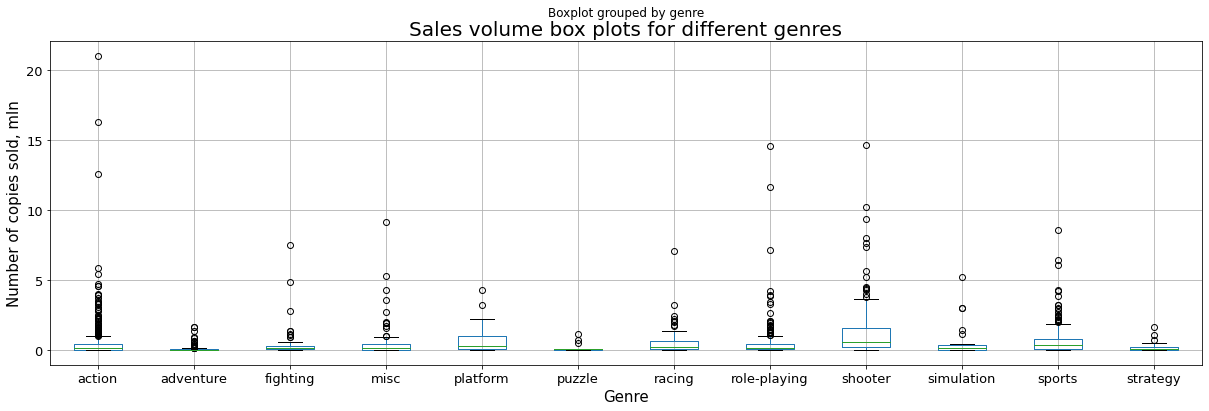

In [53]:
# box plots by genre
(cleaned_df
 .boxplot(column='total_sales', figsize=(20,6), by='genre', fontsize=13))
plt.title('Sales volume box plots for different genres', fontsize=20)
plt.xlabel('Genre', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

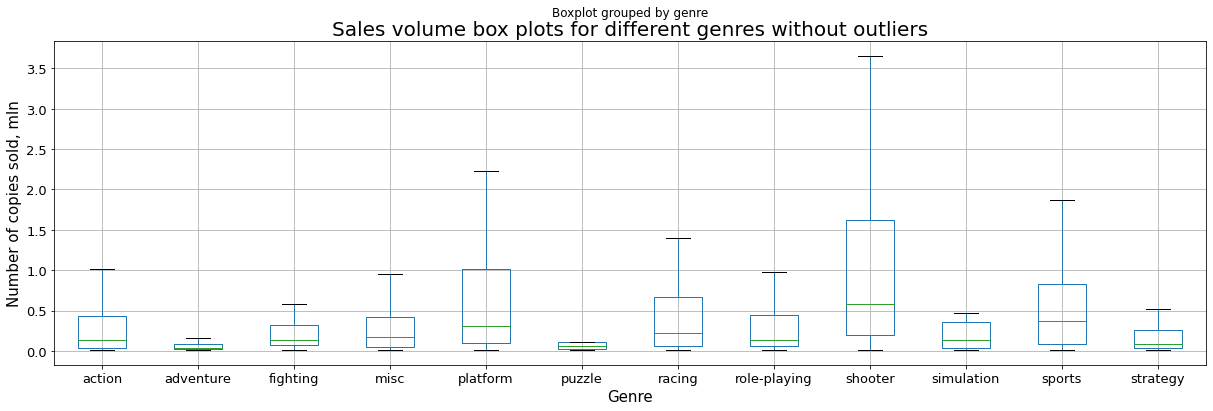

In [54]:
# box plots by genre without outliers
(cleaned_df
 .boxplot(column='total_sales', figsize=(20,6), by='genre', fontsize=13, showfliers=False))
plt.title('Sales volume box plots for different genres without outliers', fontsize=20)
plt.xlabel('Genre', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

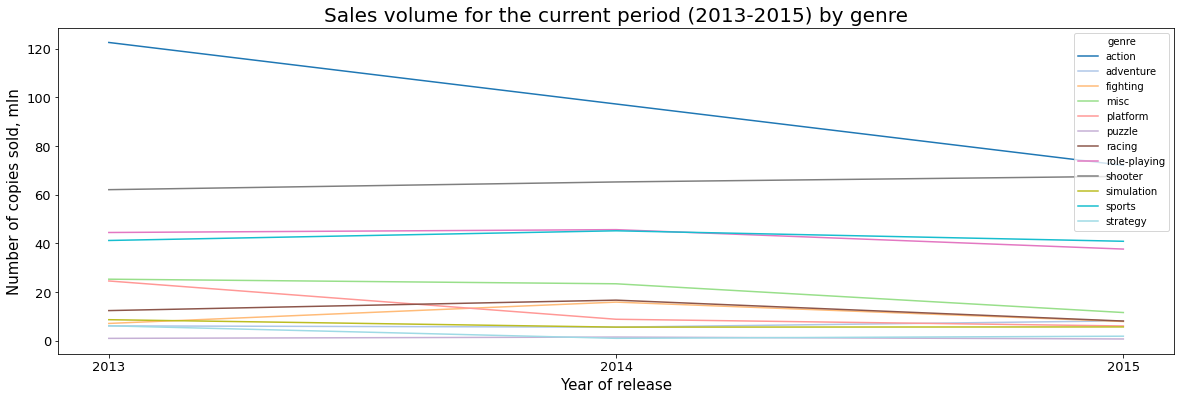

In [55]:
# sales plot by genre
(cleaned_df
 .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
 .plot(figsize=(20,6), fontsize=13, colormap='tab20'))

plt.title('Sales volume for the current period (2013-2015) by genre', fontsize=20)
plt.xlabel('Year of release', size=15)
plt.ylabel('Number of copies sold, mln', size=15)
plt.xticks((2013,2014,2015))
plt.show()

The highest median for the volume of copies sold is observed for the Shooter genre (~0.6 million copies sold). This genre is also characterized by a large 0.75 quantile - ~1.6 million copies sold. This genre also seems to be the most stable in terms of recent sales.

Despite large sales volumes, the Action genre is characterized by negative sales dynamics, a large number of outliers (behavior is less stable and likely depends on the success of the studio and the title itself), and a smaller median (~0.2 million copies sold).

The next genre in terms of sales is platform, with a smaller median and smaller 0.75 quantile (~0.3 and ~1 million copies sold, respectively).

At the bottom of the table is Sports with ~0.35 million copies and a 0.75 quantile of ~0.8 million copies sold. All three genres are characterized by more stable and higher sales volumes with fewer outliers compared to the action genre.

Therefore, marketing resources should be focused on the PS4, XONE, WiiU, and PC platforms. Potentially profitable genres are shooter, platform and sports.

#### Conclusions

* **To increase the profitability of the business, we should focus on four platforms: ps4, xone, wiiu and pc. These platforms can be viewed as potentially profitable in the near term, given the 10-year lifecycle of the platforms. At the same time, the pc platform is not subject to lifecycle effects. Sales for the pc platform are characterized as the most stable with fewer emissions. However, the PS4, XONE and WiiU platforms can generate the most revenue (higher median sales volume than the PC platform).**
* **Critics' scores have the greatest impact on game sales. The range of correlation coefficients between sales volume and critics' scores for these platforms is from 0.21 to 0.46. In this case, to increase the profitability of the store, it is necessary to focus on game titles that receive higher scores from critics (~70 points out of 100).**
* **The most potentially profitable genres include shooter, platform and sports. These genres are characterized by the highest median sales (from 0.3 to 0.6 million copies sold). At the same time, these genres seem to be the most stable in terms of sales volume compared to action genres, despite their high market share.**

### Portratis of users

In order to increase the profitability of the store, it is necessary to analyze the user behavior by region and highlight the regions that are characterized by a high volume of game sales.

In [56]:
# pivot tables for every region with top-5 and other platforms 
na_sales = (cleaned_df
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)[:5] #top5
 .append(pd #adding other platforms as 'others' category
         .Series(cleaned_df
                 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)[5:]
                 .sum(), name='others')))

eu_sales = (cleaned_df
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)[:5]
 .append(pd
         .Series(cleaned_df
                 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)[5:]
                 .sum(), name='others')))

jp_sales = (cleaned_df
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)[:5]
 .append(pd
         .Series(cleaned_df
                 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)[5:]
                 .sum(), name='others')))

In [57]:
#concatenating region sales in one df
top_platforms_regions = pd.concat([na_sales, eu_sales, jp_sales], axis=1, join='outer')

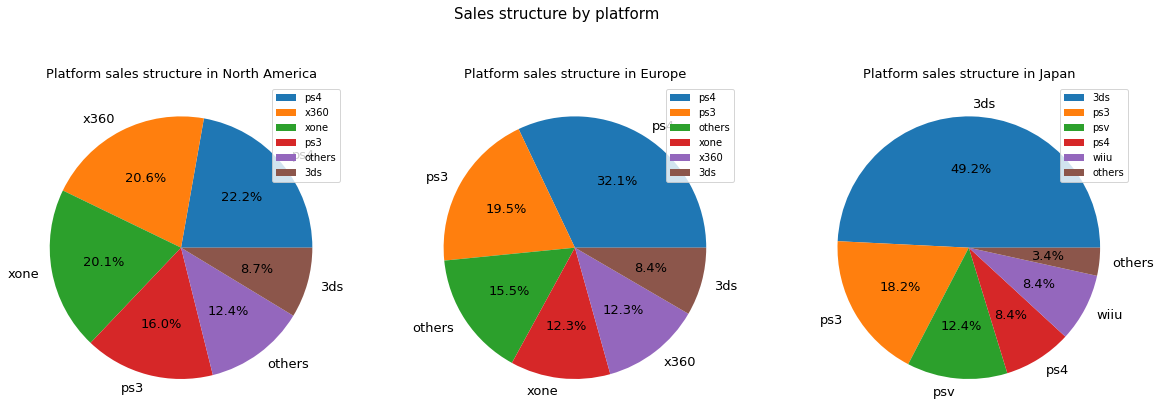

In [58]:
#3 pie charts for the sales structure by platform
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 20))
top_platforms_regions['na_sales'].dropna().sort_values(ascending=False).plot(kind='pie', ax=ax1, legend=True, autopct="%.1f%%", fontsize=13)
top_platforms_regions['eu_sales'].dropna().sort_values(ascending=False).plot(kind='pie', ax=ax2, legend=True, autopct="%.1f%%", fontsize=13)
top_platforms_regions['jp_sales'].dropna().sort_values(ascending=False).plot(kind='pie', ax=ax3, legend=True, autopct="%.1f%%", fontsize=13)
ax1.set_ylabel('')
ax1.set_title('Platform sales structure in North America', fontsize=13)
ax2.set_ylabel('')
ax2.set_title('Platform sales structure in Europe', fontsize=13)
ax3.set_ylabel('')
ax3.set_title('Platform sales structure in Japan', fontsize=13)
fig.suptitle('Sales structure by platform', fontsize=15)
fig.subplots_adjust(top=1.5)
plt.show()

In [59]:
cleaned_df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
platform,,,
3ds,28.63,59.78,34.06
ds,0.85,0.00,0.57
pc,21.83,0.00,9.75
ps3,66.55,22.05,62.83
ps4,109.31,10.22,87.25
psp,0.17,3.29,0.00
psv,5.71,15.03,4.89
wii,5.82,0.05,6.50
wiiu,18.37,10.21,27.11


The North American region is characterized by the highest sales volume in the area of console gaming. The most popular platform in this region is ps4. It is followed by platforms from American manufacturers x360 and xone. Therefore, given the market shares and lifecycles of the platforms in this region, the focus should be on games for the xone and ps4 platforms.

The European region is also dominated by console games. The ps4 platform is the most popular. At the same time, the other category is in third place, unlike the North American region (which includes the PC platform). Therefore, given the market shares and the lifecycle of the platforms in this region, we should focus on sales for the previously selected most potentially profitable platforms: xone, ps4, pc.

In Japan, the most preferred platform is Nintendo's 3ds platform. In second place is the ps3 platform. The U.S. platform Xbox was not in the top 5, nor was pc. Considering the platform life cycle and market share, we should focus on the ps4 and wiiu platforms in this region.

In [60]:
# pivot tables for every region with top-5 and other genres 
na_genre = (cleaned_df
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)[:5] #top5
 .append(pd #adding other genres as 'others' category
         .Series(cleaned_df
                 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)[5:]
                 .sum(), name='others')))

eu_genre = (cleaned_df
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)[:5]
 .append(pd
         .Series(cleaned_df
                 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)[5:]
                 .sum(), name='others')))

jp_genre = (cleaned_df
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)[:5]
 .append(pd
         .Series(cleaned_df
                 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)[5:]
                 .sum(), name='others')))

In [61]:
#concatenating region sales in one df
top_genre_regions = pd.concat([na_genre, eu_genre, jp_genre], axis=1, join='outer')

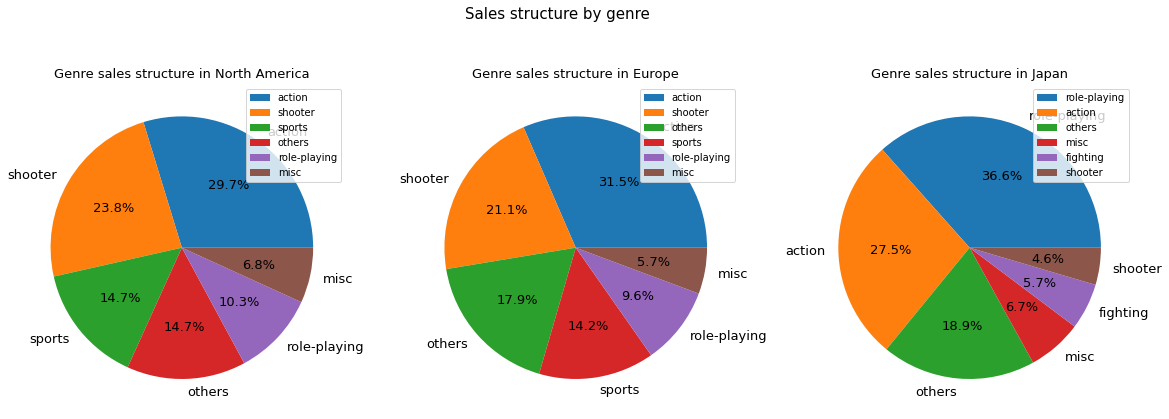

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 20))
top_genre_regions['na_sales'].dropna().sort_values(ascending=False).plot(kind='pie', ax=ax1, legend=True, autopct="%.1f%%", fontsize=13)
top_genre_regions['eu_sales'].dropna().sort_values(ascending=False).plot(kind='pie', ax=ax2, legend=True, autopct="%.1f%%", fontsize=13)
top_genre_regions['jp_sales'].dropna().sort_values(ascending=False).plot(kind='pie', ax=ax3, legend=True, autopct="%.1f%%", fontsize=13)
ax1.set_ylabel('')
ax1.set_title('Genre sales structure in North America', fontsize=13)
ax2.set_ylabel('')
ax2.set_title('Genre sales structure in Europe', fontsize=13)
ax3.set_ylabel('')
ax3.set_title('Genre sales structure in Japan', fontsize=13)
fig.suptitle('Sales structure by genre', fontsize=15)
fig.subplots_adjust(top=1.5)
plt.show()

In [63]:
cleaned_df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
genre,,,
action,107.45,33.42,116.76
adventure,6.93,4.64,6.19
fighting,7.21,6.90,13.71
misc,19.38,8.16,26.73
platform,14.19,4.68,16.85
puzzle,0.99,1.18,0.83
racing,18.42,2.29,12.23
role-playing,32.69,44.43,40.51
shooter,71.96,5.55,93.50


There are also behavioral differences in preferred genres between regions.

For example, the North American and European regions prefer action, shooter, and sports genres. In Japan, the most popular genre is role-playing.

The difference in behavior can be explained by the cultural peculiarities of each country. For example, Japan probably prefers character development games more (Japan also has a long and rich history of producing games in this genre). This is probably due to the different preferred platforms in different regions - for example, sports games are more convenient to play on consoles. In this respect, the Xbox and PS platforms are the most popular in North America and Europe.

To increase the potential profitability of the store, let's analyze the revenue shares by region.

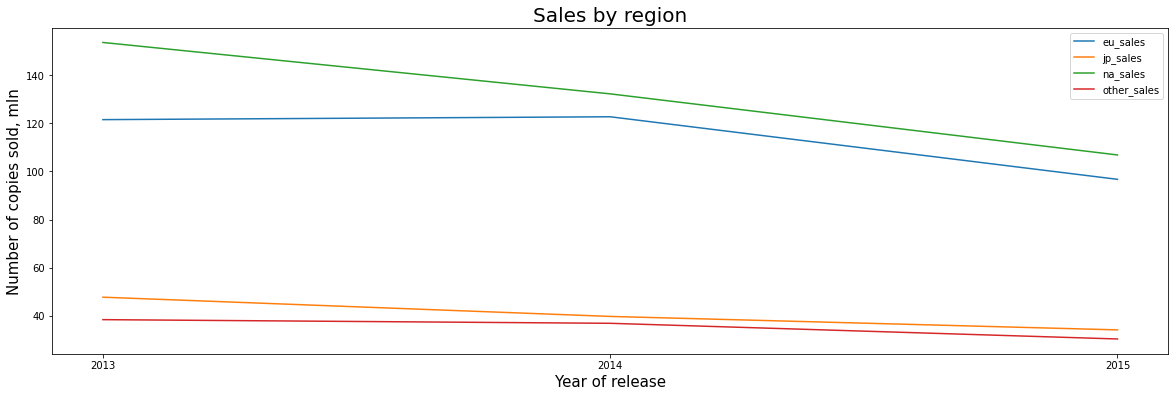

In [64]:
# region sales pivot table and a plot
(cleaned_df.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
 .plot(figsize=(20,6)))
plt.title('Sales by region', fontsize=20)
plt.xlabel('Year of release', size=15)
plt.xticks((2013,2014,2015))
plt.ylabel('Number of copies sold, mln', size=15)
plt.show()

In [65]:
cleaned_df.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales,other_sales
year_of_release,,,,
2013,121.55,47.69,153.65,38.35
2014,122.74,39.69,132.27,36.83
2015,96.72,34.09,106.86,30.31


The Japanese region accounts for approximately 10% of sales. So Europe and North America are potentially the most profitable markets. 

Next, let's analyze how the age rating of the games affects the sales volume by region. To do this, we will calculate the correlation coefficient for sales volume by region and age rating category, and construct a scatter plot for regional sales by category.

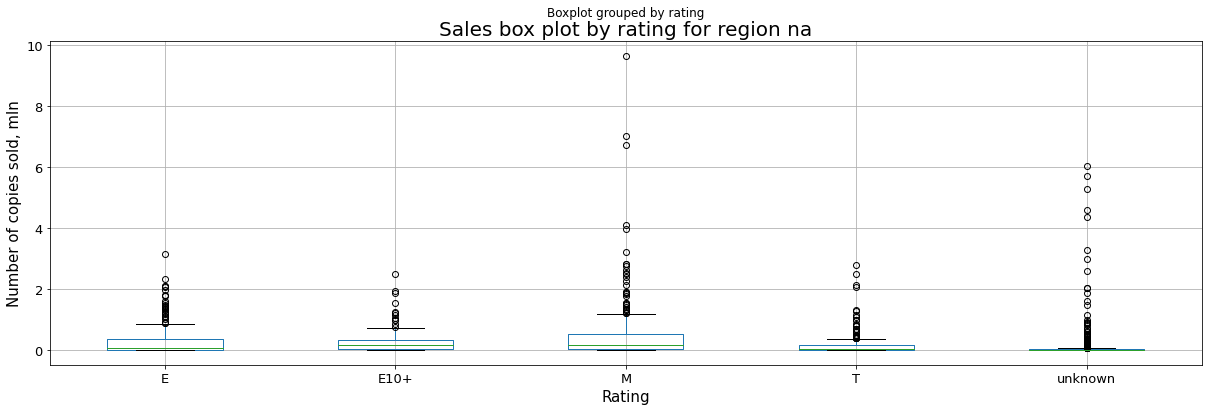

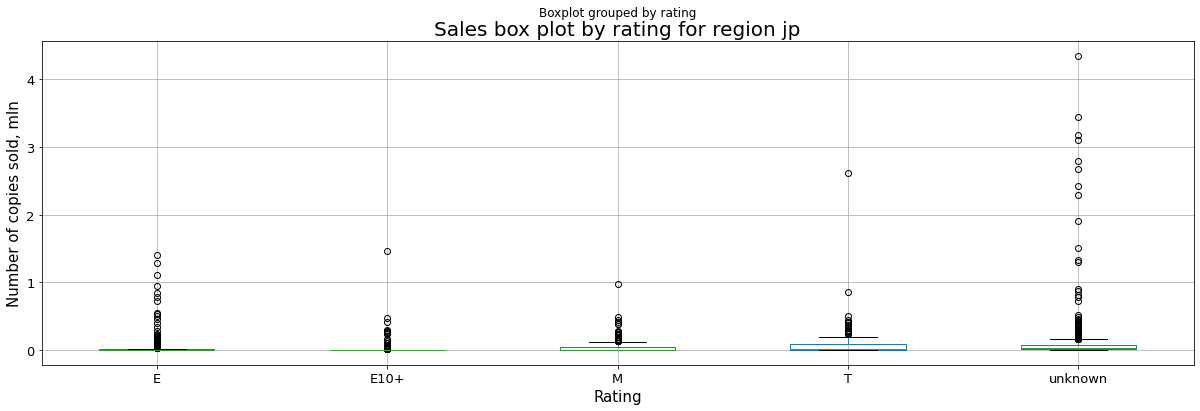

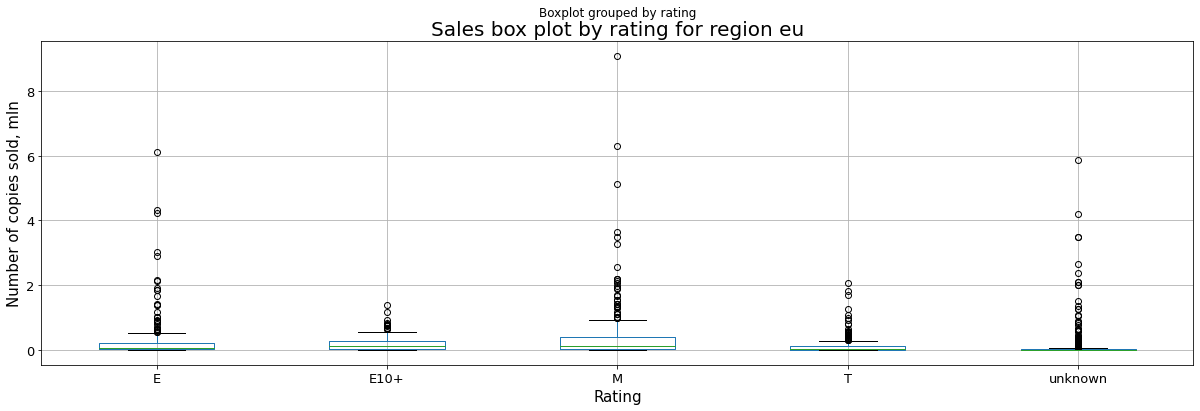

In [66]:
regions = ['na_sales', 'jp_sales', 'eu_sales']

for region in regions:
    (cleaned_df
     .boxplot(column=region, figsize=(20,6), by='rating', fontsize=13))
    plt.title(f'Sales box plot by rating for region {region[:2]}', fontsize=20)
    plt.xlabel('Rating', size=15)
    plt.ylabel('Number of copies sold, mln', size=15)
    plt.show()

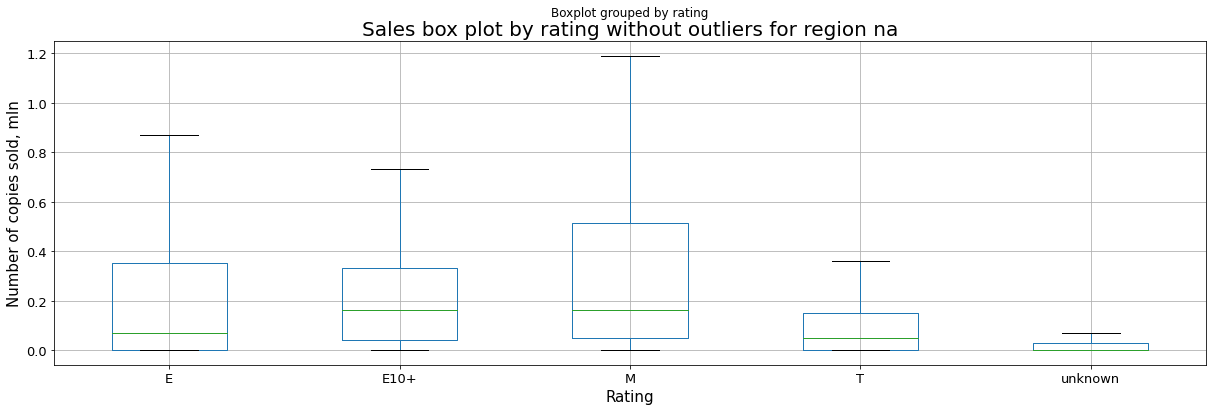

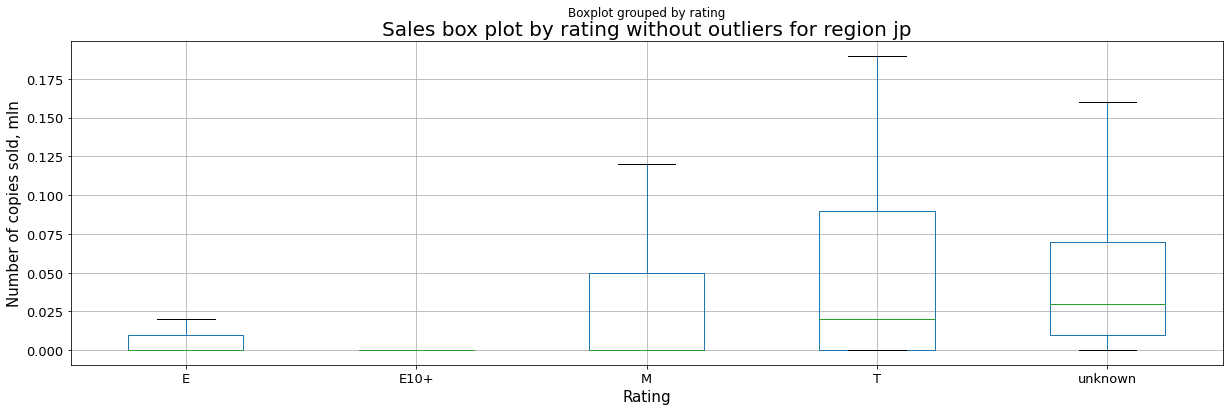

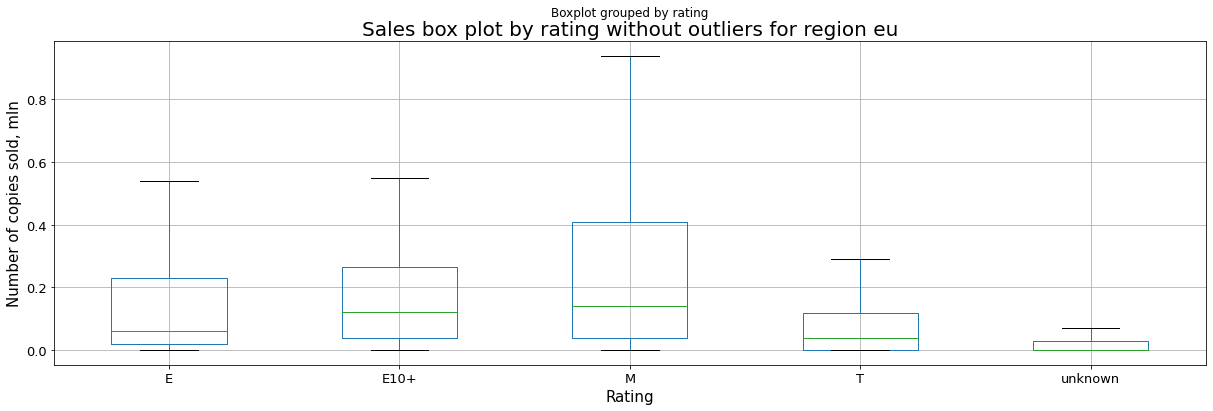

In [67]:
regions = ['na_sales', 'jp_sales', 'eu_sales']

for region in regions:
    (cleaned_df
     .boxplot(column=region, figsize=(20,6), by='rating', fontsize=13, showfliers=False))
    plt.title(f'Sales box plot by rating without outliers for region {region[:2]}', fontsize=20)
    plt.xlabel('Rating', size=15)
    plt.ylabel('Number of copies sold, mln', size=15)
    plt.show()

The highest median number of copies sold is observed in the North American and European markets for the M (Mature 17+) rating. In general, there is a tendency for sales to increase as the age rating of the game increases. 

It should be noted that games with an unknown rating have a larger median for the Japanese market. This may be due to the fact that most games for this market are produced exclusively for this market and do not have an ESRB rating.

#### Conclusions

* **To increase the profitability of the store, we should focus on the European and North American markets, as they represent the largest share of sales (Japan accounts for ~10% of the market).**
* **In the North American region, it is necessary to focus on games for platforms: xone, ps4 of shooter and sports genres (market share for the analyzed period 2013-2015 was 38.5%). In the European region it is necessary to focus on sales of games for platforms: xone, ps4 and PC (as the most stable player) of shooter and sports genres (the market share for the analyzed period of 2013-2015 was 35.3%).**
* **The best-selling games in North America and Europe are those rated 17+. In general, sales tend to increase as game ratings increase.**

### Hypothesis testing

#### Hypothesis 1. Average user ratings are the same for Xbox One and PC platforms.

The comparison will be made for the two general populations according to the samples taken from them.
In this case, the null hypothesis should be formulated so that the average user ratings of the Xbox One and PC platforms are equal.

**H0 - the average user ratings on both platforms are the same**

**H1 - the average user ratings on both platforms are not the same**

In [68]:
rating_xbox = list(cleaned_df.query('platform == "xone" & user_score.notna()')['user_score'])
rating_pc = list(cleaned_df.query('platform == "pc" & user_score.notna()')['user_score'])

To test the hypothesis we'll use ttest_ind. We take 5% (0.05) as an acceptable p-value

In [69]:
alpha = 0.05
results = st.ttest_ind(
    rating_xbox, 
    rating_pc)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.2827494983260732
Failed to reject the null hypothesis


In [70]:
print(f' Average user rating for xone: {sum(rating_xbox) / len(rating_xbox)}')
print(f' Average user rating for pc: {sum(rating_pc) / len(rating_pc)}')

 Average user rating for xone: 6.477586206896552
 Average user rating for pc: 6.258181818181818


The p-value obtained from the statistical test indicates that although the average user rating of the two platforms is not equal, there is almost a 28.3% chance that this or a greater difference could be obtained by chance. This is too high a probability to conclude that there is a meaningful difference between the average user ratings. This allows us to accept the null hypothesis that the average ratings of the Xone and PC platforms are equal.

#### Hypothesis 2. Average user ratings for Action and Sports genres are not the same

The comparison is made for two general populations based on the samples taken from them.
In this case, the null hypothesis should be formulated as follows: The average user ratings of the Action and Sports genres do not differ from each other.

**H0 - there is no difference in the average user ratings of the two genres.**

**H1 - the average user ratings of the two genres are different.**

In [71]:
rating_action = list(cleaned_df.query('genre == "action" & user_score.notna()')['user_score'])
rating_sports = list(cleaned_df.query('genre == "sports" & user_score.notna()')['user_score'])

To test the hypothesis we'll use ttest_ind. We take 5% (0.05) as an acceptable p-value

In [72]:
alpha = 0.05
results = st.ttest_ind(
    rating_action, 
    rating_sports)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 4.1579892916741545e-26
Reject the null hypothesis


In [73]:
print(f' Average user rating for action: {sum(rating_action) / len(rating_action)}')
print(f' Average user rating for sports: {sum(rating_sports) / len(rating_sports)}')

 Average user rating for action: 6.893092105263157
 Average user rating for sports: 5.179674796747967


Thus, the test results show that the probability of obtaining the observed result if the null hypothesis is true is less than the given significance level (the probability of obtaining results confirming the null hypothesis is extremely low). This allows us to reject the null hypothesis of equality of the average user ratings of the two genres in favor of the alternative hypothesis - the average rating of the two platforms is different.

### Summary

* **Focus on North America and Europe to increase profitability of business. Japan accounts for ~10% of sales. Considering the lifecycle of the platforms (the analysis showed that the platforms last 10 years on average), the xone and ps4 are potentially profitable in the Americas. For the European region, marketing resources should be focused on the Xone, PS4 and PC (as the most stable players). The potentially lucrative genres in America and Europe are shooters and sports (market share in America 38.5%, in Europe 35.3%).**

* **Critics' scores have the greatest impact on sales. The range of correlation coefficients between sales volume and critics' scores for these platforms is from 0.21 to 0.46. In this case, to increase the profitability of the store, it is necessary to focus on game titles that receive higher scores from critics (~70 points out of 100).**

* **It should be noted that user behavior differs slightly from region to region. For example, in Japan they prefer character development games (Japan has a long and rich history of producing games in this genre). Presumably, this leads to the difference in preferred platforms in different regions - for example, sports games are more convenient to play on consoles. In this regard, the Xbox and PS platforms are the most popular in North America and Europe.**

* **Regarding the average user ratings of the Xone and PC platforms, although they are unequal (average user rating for Xone: ~6.5, while average user rating for PC: ~6.3), the p-value obtained in the statistical test (28.3%) indicates that this or a greater difference could be obtained by chance. This allows us to accept the null hypothesis that the average ratings of the Xone and PC platforms are equal. Thus, for example, marketing resources should be focused on the Xone and PC platforms (if their popularity increases) according to their market shares.**

* **As for the average user ratings of the Action and Sports genres, they differ from each other. The average user rating for Action: is ~6.9, while the average user rating for Sports: is ~5.2. A statistical test rejected the hypothesis that the average ratings of the two platforms are equal. Therefore, marketing resources should be focused on the action genre.**